In [38]:
%pip install scipy

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
df=pd.read_csv('datasets\insurance - insurance.csv')
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\i'
C:\Users\kelvi\AppData\Local\Temp\ipykernel_8696\2506013537.py:5: SyntaxWarning: invalid escape sequence '\i'
  df=pd.read_csv('datasets\insurance - insurance.csv')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


label encoding for categorical data 

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['sex','smoker','region']:
    df[i] = le.fit_transform(df[i])

Box Plot to find out outliers

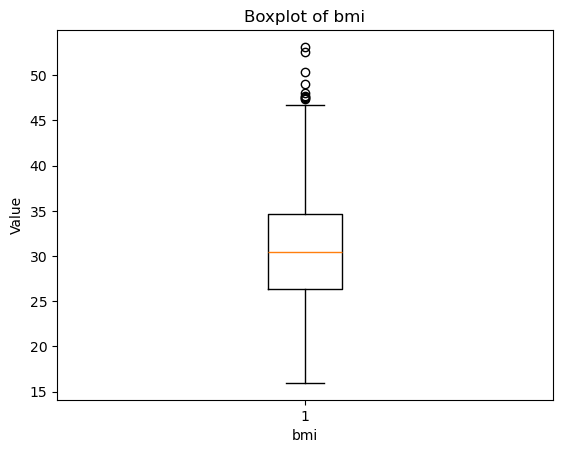

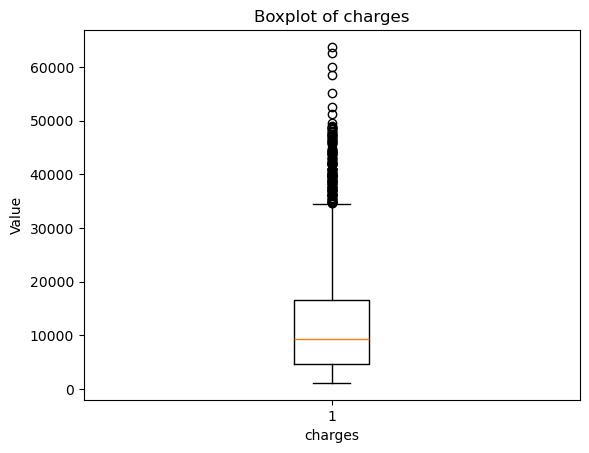

In [41]:
for i in ['bmi','charges']:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {i}')
    plt.show()

using zscore to remove outliers

In [42]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df))
df = df[(z_scores < 3).all(axis=1)]

Normalization of data

In [43]:
from sklearn.preprocessing import StandardScaler
sl = StandardScaler()
for i in ['age','bmi']:
    df[i] = sl.fit_transform(df[i].values.reshape(-1,1))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.439063,0,-0.449359,0,1,3,16884.92400
1,-1.510086,1,0.533391,1,0,2,1725.55230
2,-0.799859,1,0.404478,3,0,2,4449.46200
3,-0.444746,1,-1.319101,0,0,1,21984.47061
4,-0.515769,1,-0.285288,0,0,1,3866.85520


In [44]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean()) 

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.439063,0,-0.449359,0,1,3,16884.92400
1,-1.510086,1,0.533391,1,0,2,1725.55230
2,-0.799859,1,0.404478,3,0,2,4449.46200
3,-0.444746,1,-1.319101,0,0,1,21984.47061
4,-0.515769,1,-0.285288,0,0,1,3866.85520


In [46]:
x = df.drop(columns=['charges','children','region'])
y = df['charges']

Train Test split data

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_log_error,r2_score,adjusted_rand_score
mean_absolute_error=mean_absolute_error(y_test,y_pred,multioutput='raw_values')
print('mean_absolute_error',mean_absolute_error)
mean_squared_error=mean_squared_error(y_test,y_pred)
print('mean_squared_error',mean_squared_error)
# root_mean_squared_log_error=root_mean_squared_log_error(y_test,y_pred)
# print('root_mean_squared_log_error',root_mean_squared_log_error)
r2_score=r2_score(y_test,y_pred)
print('r2_score',r2_score)
adjusted_rand_score=adjusted_rand_score(y_test,y_pred)
print('adjusted_rand_score',adjusted_rand_score)

mean_absolute_error [4162.70059343]
mean_squared_error 33407049.375693254
r2_score 0.785788002372579
adjusted_rand_score 0.0


c:\Users\kelvi\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


Mean absolute error says their is a significant diffrence between actual and predicted value around 4162.70 mean value

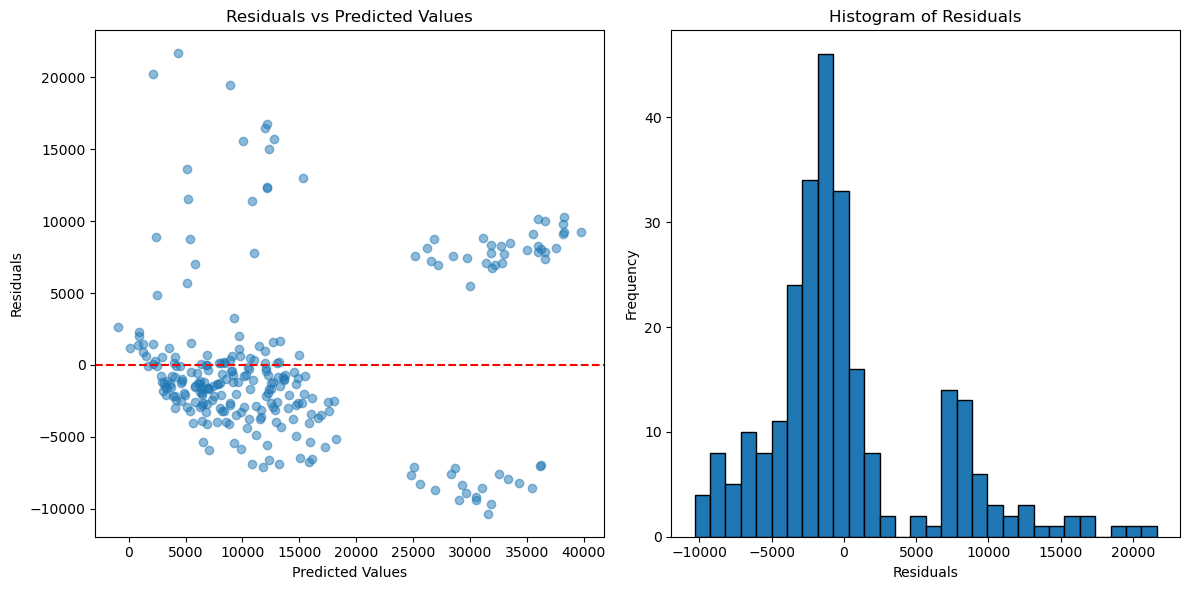

In [52]:
residuals = y_test - y_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Plot histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

In [53]:
y_test = list(y_test)
y_pred = list(y_pred)
# print('actual value',)
# print('predicted value',y_pred[i])
# print('difference',y_test[i]-y_pred[i])
for i in range(1,5):
    print('actual value',y_test[i])
    print('predicted value',y_pred[i])
    print('difference',y_test[i]-y_pred[i])

actual value 3056.3881
predicted value 3820.4304303693243
difference -764.0423303693242
actual value 12643.3778
predicted value 13680.733855690094
difference -1037.3560556900939
actual value 4433.9159
predicted value 6416.950150107341
difference -1983.034250107341
actual value 14988.432
predicted value 13293.447687139987
difference 1694.9843128600132


Text(0, 0.5, 'y_pred')

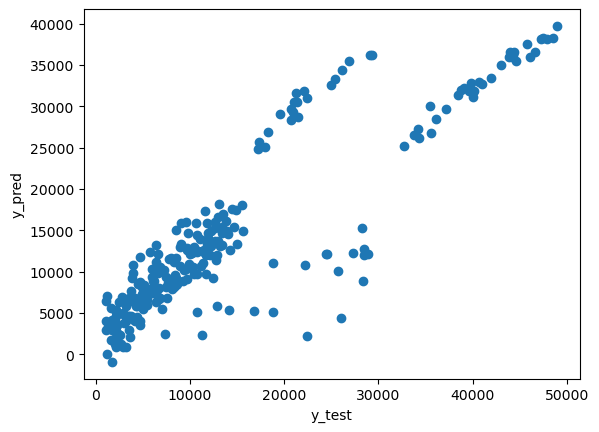

In [54]:

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

Scatter Plot to visualize actual and predicted value

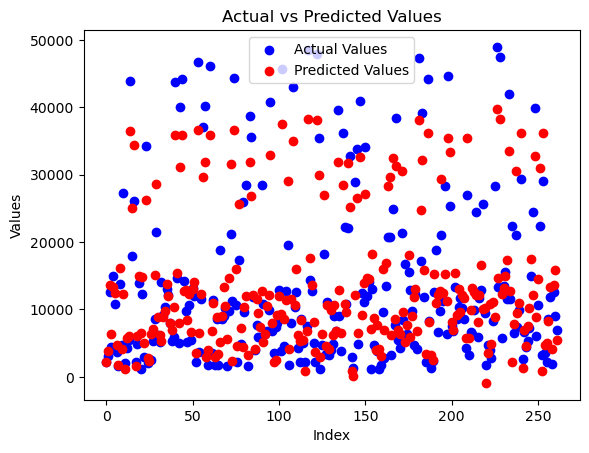

In [55]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

To geth the training model prediction value comprarisson 

In [56]:
y_pred_train = model.predict(x_train)


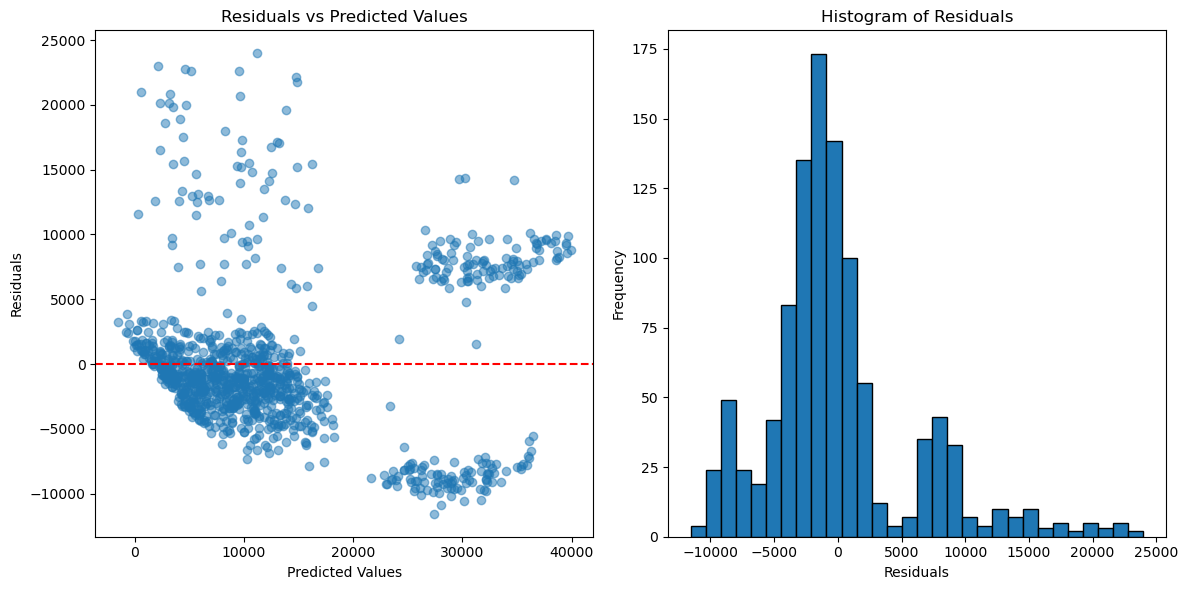

In [57]:


residuals = y_train - y_pred_train

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_train, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Plot histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()


In [58]:
from sklearn.metrics import accuracy_score
y_pred_train=list(y_pred_train)
y_train=list(y_train)
for i in range(1,5):
    print('actual value',y_train[i])
    print('predicted value',y_pred_train[i])
    print('difference',y_test[i]-y_pred[i])

actual value 3393.35635
predicted value 5504.732321938694
difference -764.0423303693242
actual value 33907.548
predicted value 26630.011524465852
difference -1037.3560556900939
actual value 11015.1747
predicted value 9752.21830030687
difference -1983.034250107341
actual value 4779.6023
predicted value 6022.547698240207
difference 1694.9843128600132


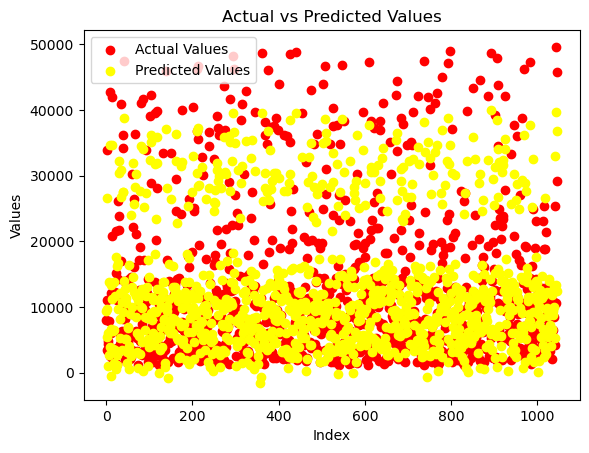

In [62]:
plt.scatter(range(len(y_train)), y_train, color='red', label='Actual Values')
plt.scatter(range(len(y_pred_train)), y_pred_train, color='yellow', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()